In [1]:
#Imports
import re
import unicodedata
import pandas as pd
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from env import get_database
import prepare

In [2]:
#Get SQL database url
url = get_database('spam_db')
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [3]:
#Read SQL
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
y = []
for i in df['text']:
    x = prepare.lower_case(i)
    y.append(x)

In [6]:
df['text'] = y

In [7]:
ham_df = df[df['label'] == 'ham']
spam_df = df[df['label'] == 'spam']

In [8]:
ham_words = ' '.join(ham_df['text']) #this takes a column and cobines all the text into one block
spam_words = ' '.join(spam_df['text'])

In [9]:

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [10]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

In [11]:
spam_words = clean(spam_words)

In [12]:
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st']

In [13]:
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2)).value_counts()
spam_bigrams



(please, call)           44
(customer, service)      27
(1000, cash)             25
(po, box)                24
(guaranteed, call)       23
                         ..
(dirty, live)             1
(extreme, dirty)          1
(listen, extreme)         1
(09090900040, listen)     1
(now1, 10p)               1
Length: 6854, dtype: int64

In [14]:
ham_words = clean(ham_words)

In [15]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2)).value_counts()
ham_bigrams


(call, later)     52
(ill, call)       48
(let, know)       42
(sorry, ill)      39
(dont, know)      33
                  ..
(slave, going)     1
(come, slave)      1
(help, come)       1
(soon, sorry)      1
(true, name)       1
Length: 30687, dtype: int64

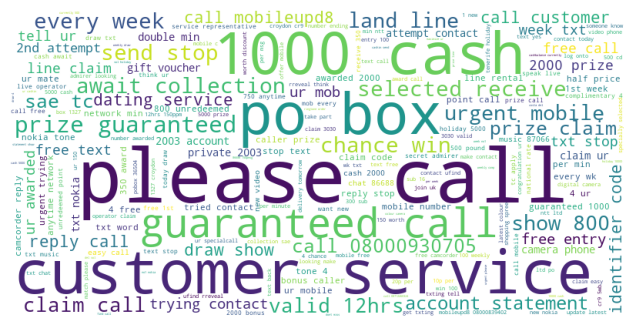

In [16]:
data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

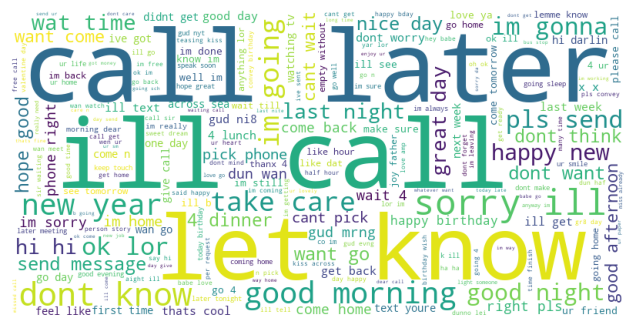

In [17]:
data1 = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img1 = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data1)
plt.figure(figsize=(8, 4))
plt.imshow(img1)
plt.axis('off')
plt.show()

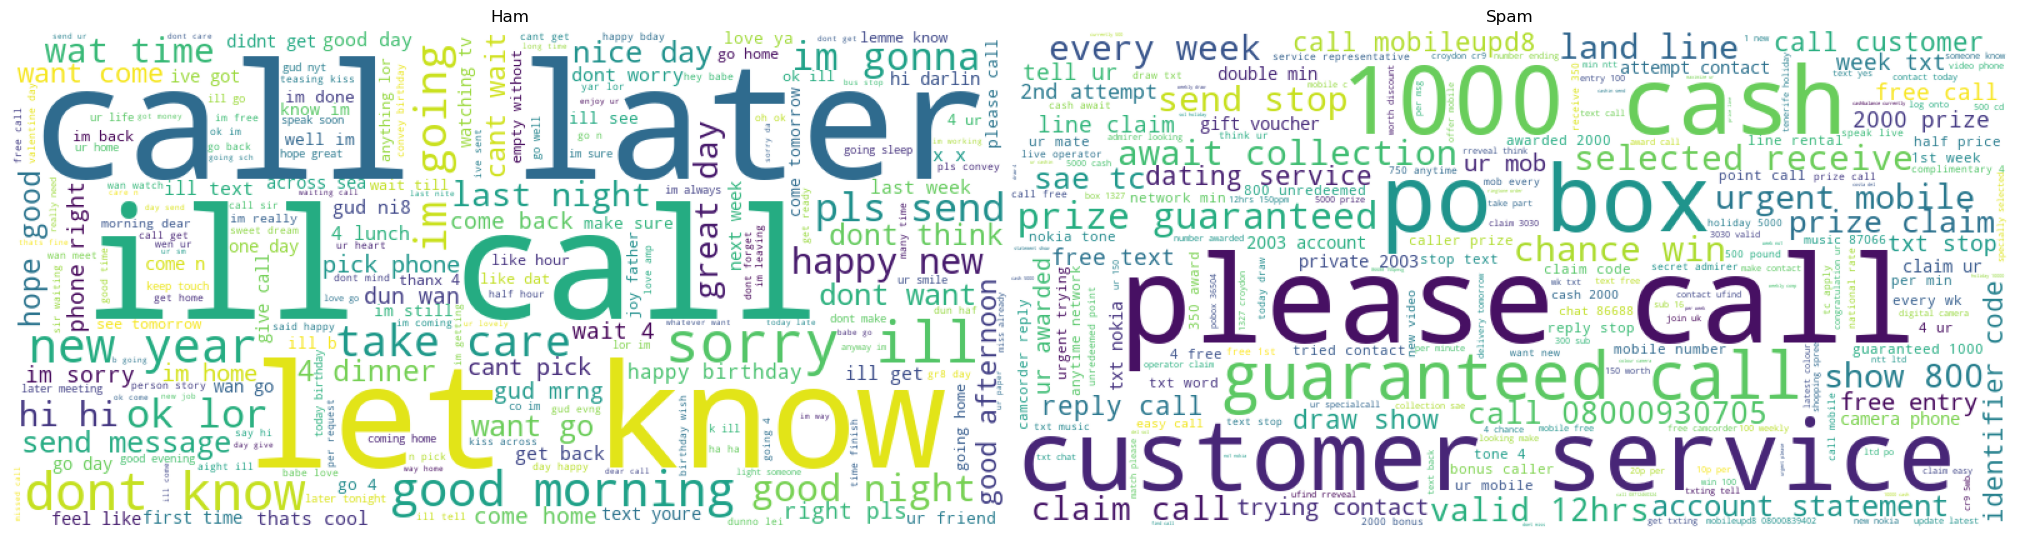

In [18]:
plt.figure(figsize=(10, 8))
axs = [plt.axes([2, 1, 1, 1]), plt.axes([1, 1, 1, 1])]

axs[0].imshow(img)
axs[1].imshow(img1)

axs[0].set_title('Spam')
axs[1].set_title('Ham')

for ax in axs: ax.axis('off')


## ^ the above WordClouds represent bigrams of top ham and spam words

In [19]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3)).value_counts()

ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts()



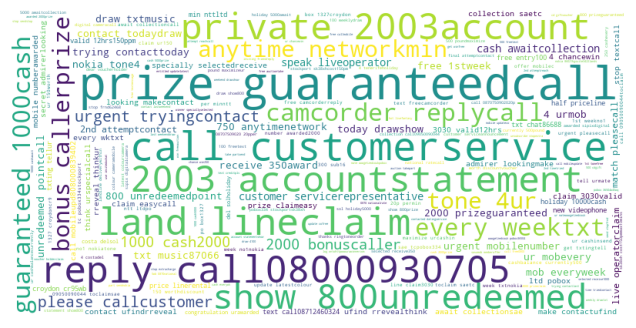

In [20]:
data = {k[0] + ' ' + k[1] + k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

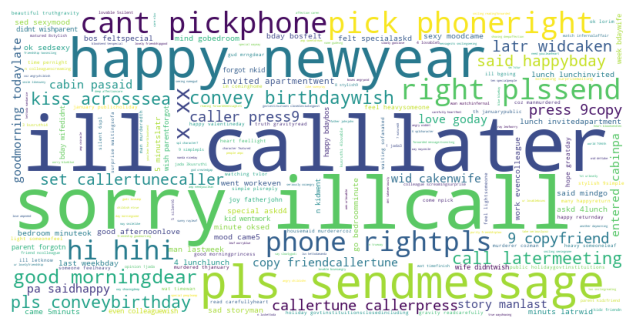

In [21]:
data = {k[0] + ' ' + k[1] + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [22]:
import acquire

# Exercise 2

In [23]:
blog = acquire.scrape_codeup('https://codeup.com/blog/')

In [44]:
blog[1]

{'title': 'Black excellence in tech: Panelist Spotlight – James Cooper',
 'content': '\nBlack excellence in tech: Panelist Spotlight – James Cooper\nCodeup is hosting our second Black Excellence in Tech Panel in honor of Black History Month on February 22, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as black leaders in the tech industry! \nMeet James!\n\nJames Cooper is the Senior Placement Manager at Codeup, and will also be the Moderator for the Black Excellence in Tech Panel. James previously served as an Athletic Director in higher education and in that role his responsibilities included liaison for Title IX. As Title IX liaison, James oversaw complaints of discrimination and identifying and addressing any patterns or systemic problems that arose during the review of complaints. Additionally, he spent two years assisting the Department of Justice in building college campuses’

In [25]:
numbers = list(range(0, len(blog) - 1))

In [37]:
content = []
for i in numbers:
    whatever = blog[i]['content']
    content.append(whatever)
content[1]

'\nBlack excellence in tech: Panelist Spotlight – James Cooper\nCodeup is hosting our second Black Excellence in Tech Panel in honor of Black History Month on February 22, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as black leaders in the tech industry! \nMeet James!\n\nJames Cooper is the Senior Placement Manager at Codeup, and will also be the Moderator for the Black Excellence in Tech Panel. James previously served as an Athletic Director in higher education and in that role his responsibilities included liaison for Title IX. As Title IX liaison, James oversaw complaints of discrimination and identifying and addressing any patterns or systemic problems that arose during the review of complaints. Additionally, he spent two years assisting the Department of Justice in building college campuses’ capacity to lessen violence against women, to administer justice for victims of dome

In [38]:
content[1]

'\nBlack excellence in tech: Panelist Spotlight – James Cooper\nCodeup is hosting our second Black Excellence in Tech Panel in honor of Black History Month on February 22, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as black leaders in the tech industry! \nMeet James!\n\nJames Cooper is the Senior Placement Manager at Codeup, and will also be the Moderator for the Black Excellence in Tech Panel. James previously served as an Athletic Director in higher education and in that role his responsibilities included liaison for Title IX. As Title IX liaison, James oversaw complaints of discrimination and identifying and addressing any patterns or systemic problems that arose during the review of complaints. Additionally, he spent two years assisting the Department of Justice in building college campuses’ capacity to lessen violence against women, to administer justice for victims of dome

In [39]:
articles = []
for i in numbers:
    cleaned = clean(content[i])
    articles.append(cleaned)
articles

[['black',
  'excellence',
  'tech',
  'panelist',
  'spotlight',
  'stephanie',
  'jones',
  'codeup',
  'hosting',
  'second',
  'black',
  'excellence',
  'tech',
  'panel',
  'honor',
  'black',
  'history',
  'month',
  'february',
  '22',
  '2023',
  'celebrate',
  'wed',
  'like',
  'spotlight',
  'panelist',
  'leading',
  'discussion',
  'learn',
  'bit',
  'respective',
  'experience',
  'black',
  'leader',
  'tech',
  'industry',
  'meet',
  'stephanie',
  'stephanie',
  'jones',
  'alumna',
  'codeups',
  'data',
  'science',
  'program',
  'march',
  '2022',
  'currently',
  'work',
  'business',
  'intelligence',
  'developer',
  'victory',
  'capital',
  'global',
  'investment',
  'management',
  'firm',
  'based',
  'san',
  'antonio',
  'tx',
  'stephanie',
  'passionate',
  'visual',
  'storytelling',
  'late',
  'tech',
  'bloomer',
  'also',
  'advocate',
  'equitable',
  'access',
  'educational',
  'opportunity',
  'technology',
  'underserved',
  'community',
 

In [41]:
content_df = pd.DataFrame({'content':content})
content_df

,content
0,\nBlack excellence in tech: Panelist Spotlight...
1,\nBlack excellence in tech: Panelist Spotlight...
2,\nBlack excellence in tech: Panelist Spotlight...
3,\nIf you’re interested in embarking on a caree...
4,\nCodeup is pleased to announce we have been r...


In [47]:
content_words = ' '.join(content_df['content'])
content_words[:100]

'\nBlack excellence in tech: Panelist Spotlight – Stephanie Jones\nCodeup is hosting our second Black E'

In [63]:
words = prepare.lower_case(content_words)

In [66]:
words[:100]

' black excellence in tech panelist spotlight  stephanie jones codeup is hosting our second black exc'

(-0.5, 399.5, 199.5, -0.5)

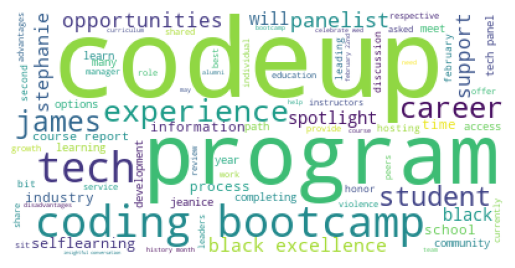

In [68]:
img = WordCloud(background_color='white').generate(words)
plt.imshow(img)
plt.axis('off')

In [95]:
blog_freq = clean(words)
blog_freq = pd.Series(blog_freq).value_counts()
blog_freq = pd.DataFrame(blog_freq)

In [96]:
s = blog_freq.xs('', axis = 1)
s

KeyError: ''

In [76]:
bigrams = nltk.ngrams(words.split(), 1)
list(bigrams)

[('black',),
 ('excellence',),
 ('in',),
 ('tech',),
 ('panelist',),
 ('spotlight',),
 ('stephanie',),
 ('jones',),
 ('codeup',),
 ('is',),
 ('hosting',),
 ('our',),
 ('second',),
 ('black',),
 ('excellence',),
 ('in',),
 ('tech',),
 ('panel',),
 ('in',),
 ('honor',),
 ('of',),
 ('black',),
 ('history',),
 ('month',),
 ('on',),
 ('february',),
 ('22',),
 ('2023',),
 ('to',),
 ('further',),
 ('celebrate',),
 ('wed',),
 ('like',),
 ('to',),
 ('spotlight',),
 ('each',),
 ('of',),
 ('our',),
 ('panelists',),
 ('leading',),
 ('up',),
 ('to',),
 ('the',),
 ('discussion',),
 ('to',),
 ('learn',),
 ('a',),
 ('bit',),
 ('about',),
 ('their',),
 ('respective',),
 ('experiences',),
 ('as',),
 ('black',),
 ('leaders',),
 ('in',),
 ('the',),
 ('tech',),
 ('industry',),
 ('meet',),
 ('stephanie',),
 ('stephanie',),
 ('jones',),
 ('is',),
 ('an',),
 ('alumna',),
 ('of',),
 ('codeups',),
 ('data',),
 ('science',),
 ('program',),
 ('march',),
 ('2022',),
 ('and',),
 ('currently',),
 ('works',),
 ('as',

In [74]:
top_20_blog_words = (pd.Series(nltk.ngrams(words, 2))
                      .value_counts()
                      .head(20))
top_20_blog_words

(s,  )    241
(e,  )    239
( , a)    215
( , t)    214
(i, n)    188
(a, n)    141
(n,  )    133
(t, h)    127
(d,  )    127
(t,  )    124
( , c)    119
( , s)    117
( , o)    116
( , i)    116
(r,  )    115
(o, n)    110
(o, r)    107
(e, s)    103
(e, r)    103
(t, i)     98
dtype: int64